In [ ]:
# Forage
# British Airways

In [2]:
# Project Flow

In [ ]:
# Task 1

### Web scraping and analysis
This Jupyter notebook includes some code to get you started with web scraping. We will use a package called BeautifulSoup to collect the data from the web. Once you've collected your data and saved it into a local .csv file you should start with your analysis.

 ### Scraping data from Skytrax
If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use Python and BeautifulSoup to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
# Import Warnings

In [2]:
import warnings

In [ ]:
# Libraries

In [3]:
import numpy as np
import pandas as pd

import requests
from bs4 import BeautifulSoup

from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Collecting Data

In [4]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 37 #10
page_size = 100 #100

reviews = []
aircraft = []
seat_type = []
route = []
recommended = []
df = pd.DataFrame()

# for i in range(1, pages + 1):
for i in range(1, pages + 1):
    
    rating = []
    category = []

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
        
    for para2 in parsed_content.find_all("div", {"class" : "review-stats"}):
        for para3 in para2.find_all('td',{'class' : 'review-value'}):
            rating.append(para3.get_text())
        recomend = rating[-1]
        rating = rating[:-1]
        
        for para4 in para2.find_all('td',{'class' : 'review-rating-stars stars'}):
            para5 = len(para4.find_all('span', {'class' : 'star fill'}))
            rating.append(para5)
        rating.append(recomend)
        #print(rating)
        
        for para6 in para2.find_all('td',{'class' : 'review-rating-header'}):
            category.append(para6.get_text())
            
        #print(category)
        # Create the records from both list, using zip and dict calls.

        # Build the dataframe from the dictionary.
        data_dict = pd.DataFrame([rating], columns=category)
        df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
        #print(df)
        rating = []
        category = []
        
    print(f"   ---> {len(reviews)} total reviews")

df["reviews"] = reviews

Scraping page 1


C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

   ---> 100 total reviews
Scraping page 2


C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

   ---> 200 total reviews
Scraping page 3


C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

   ---> 300 total reviews
Scraping page 4


C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

   ---> 400 total reviews
Scraping page 5


C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

   ---> 500 total reviews
Scraping page 6


C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

   ---> 600 total reviews
Scraping page 7


C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

   ---> 700 total reviews
Scraping page 8


C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

   ---> 800 total reviews
Scraping page 9


C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)


   ---> 900 total reviews
Scraping page 10


C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)


   ---> 1000 total reviews
Scraping page 11


C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

   ---> 1100 total reviews
Scraping page 12


C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

   ---> 1200 total reviews
Scraping page 13


C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

   ---> 1300 total reviews
Scraping page 14


C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)


   ---> 1400 total reviews
Scraping page 15


C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

   ---> 1500 total reviews
Scraping page 16


C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

   ---> 1600 total reviews
Scraping page 17


C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

   ---> 1700 total reviews
Scraping page 18


C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

   ---> 1800 total reviews
Scraping page 19


C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

   ---> 1900 total reviews
Scraping page 20


C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

   ---> 2000 total reviews
Scraping page 21


C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

   ---> 2100 total reviews
Scraping page 22


C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

   ---> 2200 total reviews
Scraping page 23


C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

   ---> 2300 total reviews
Scraping page 24


C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

   ---> 2400 total reviews
Scraping page 25


C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

   ---> 2500 total reviews
Scraping page 26


C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

   ---> 2600 total reviews
Scraping page 27


C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

   ---> 2700 total reviews
Scraping page 28


C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

   ---> 2800 total reviews
Scraping page 29


C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

   ---> 2900 total reviews
Scraping page 30


C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

   ---> 3000 total reviews
Scraping page 31


C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

   ---> 3100 total reviews
Scraping page 32


C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

   ---> 3200 total reviews
Scraping page 33


C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

   ---> 3300 total reviews
Scraping page 34


C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

   ---> 3400 total reviews
Scraping page 35


C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

   ---> 3500 total reviews
Scraping page 36


C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)


   ---> 3600 total reviews
Scraping page 37


C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

   ---> 3700 total reviews


C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\2500717073.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

In [ ]:
# Sample

In [5]:
df

,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Ground Service,Wifi & Connectivity,Value For Money,Recommended,Aircraft,Food & Beverages,Inflight Entertainment,reviews
0,Solo Leisure,Economy Class,London to Basel,June 2024,1.0,1.0,1.0,1.0,1,no,NaN,NaN,NaN,"Not Verified | Before my flight, I was forced ..."
1,Solo Leisure,Business Class,Vancouver to London,July 2024,5.0,5.0,4.0,NaN,4,yes,A350,5.0,5.0,✅ Trip Verified | British Airways at its bes...
2,Solo Leisure,Economy Class,London to Amman,August 2024,3.0,5.0,4.0,NaN,4,yes,A320,4.0,NaN,✅ Trip Verified | An excellent flight! Despite...
3,Family Leisure,Economy Class,Barcelona to Dallas via Heathrow,August 2024,3.0,4.0,2.0,NaN,3,no,A380,4.0,4.0,✅ Trip Verified | I recently traveled with Bri...
4,Family Leisure,Economy Class,London to Hong Kong,August 2024,1.0,NaN,1.0,NaN,1,no,NaN,NaN,NaN,✅ Trip Verified | My family and I were booke...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3695,NaN,First Class,NaN,NaN,5.0,5.0,NaN,NaN,4,yes,NaN,4.0,0.0,Flew BA 025 Heathrow to Hong Kong in First Cla...
3696,NaN,Economy Class,NaN,NaN,1.0,1.0,NaN,NaN,1,no,NaN,1.0,1.0,Travelled from OZ to watch start of TDF in Lee...
3697,NaN,Premium Economy,NaN,NaN,4.0,4.0,NaN,NaN,3,yes,NaN,3.0,3.0,Travelled with my husband sister and brother i...
3698,NaN,Business Class,NaN,NaN,5.0,5.0,NaN,NaN,5,yes,NaN,4.0,5.0,Flew YYZ to LHR on 1st July. Booked WT+ but wa...


In [ ]:
# Saving as CSV File

In [11]:
# df.to_csv("British_Airways_reviews.csv", index=False)

In [ ]:
# Opening the CSV File

In [ ]:
# df = pd.read_csv('British_Airways_reviews.csv')

In [14]:
# Basic info

In [ ]:
# Checking for Null values

In [6]:
df.isnull().sum()

Type Of Traveller          630
Seat Type                    2
Route                      634
Date Flown                 637
Seat Comfort               122
Cabin Staff Service        136
Ground Service             708
Wifi & Connectivity       3039
Value For Money              0
Recommended                  0
Aircraft                  1697
Food & Beverages           417
Inflight Entertainment    1206
reviews                      0
dtype: int64

Data Cleaning

In [7]:
df.shape

(3700, 14)

In [8]:
df

,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Ground Service,Wifi & Connectivity,Value For Money,Recommended,Aircraft,Food & Beverages,Inflight Entertainment,reviews
0,Solo Leisure,Economy Class,London to Basel,June 2024,1.0,1.0,1.0,1.0,1,no,NaN,NaN,NaN,"Not Verified | Before my flight, I was forced ..."
1,Solo Leisure,Business Class,Vancouver to London,July 2024,5.0,5.0,4.0,NaN,4,yes,A350,5.0,5.0,✅ Trip Verified | British Airways at its bes...
2,Solo Leisure,Economy Class,London to Amman,August 2024,3.0,5.0,4.0,NaN,4,yes,A320,4.0,NaN,✅ Trip Verified | An excellent flight! Despite...
3,Family Leisure,Economy Class,Barcelona to Dallas via Heathrow,August 2024,3.0,4.0,2.0,NaN,3,no,A380,4.0,4.0,✅ Trip Verified | I recently traveled with Bri...
4,Family Leisure,Economy Class,London to Hong Kong,August 2024,1.0,NaN,1.0,NaN,1,no,NaN,NaN,NaN,✅ Trip Verified | My family and I were booke...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3695,NaN,First Class,NaN,NaN,5.0,5.0,NaN,NaN,4,yes,NaN,4.0,0.0,Flew BA 025 Heathrow to Hong Kong in First Cla...
3696,NaN,Economy Class,NaN,NaN,1.0,1.0,NaN,NaN,1,no,NaN,1.0,1.0,Travelled from OZ to watch start of TDF in Lee...
3697,NaN,Premium Economy,NaN,NaN,4.0,4.0,NaN,NaN,3,yes,NaN,3.0,3.0,Travelled with my husband sister and brother i...
3698,NaN,Business Class,NaN,NaN,5.0,5.0,NaN,NaN,5,yes,NaN,4.0,5.0,Flew YYZ to LHR on 1st July. Booked WT+ but wa...


In [12]:
# Data Cleaning

In [ ]:
# Removing unnecessary data

In [9]:
remove_text = ['✅ Trip Verified', 'Not Verified |']

for i in range(len(df['reviews'])):
    for j in remove_text:
        if j in df['reviews'][i]:
            df['reviews'] = df['reviews'].str.replace(j,'')

C:\Users\rjsek\AppData\Local\Temp\ipykernel_5288\422421243.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviews'] = df['reviews'].str.replace(j,'')


In [10]:
df

,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Ground Service,Wifi & Connectivity,Value For Money,Recommended,Aircraft,Food & Beverages,Inflight Entertainment,reviews
0,Solo Leisure,Economy Class,London to Basel,June 2024,1.0,1.0,1.0,1.0,1,no,NaN,NaN,NaN,"| Before my flight, I was forced by the ground..."
1,Solo Leisure,Business Class,Vancouver to London,July 2024,5.0,5.0,4.0,NaN,4,yes,A350,5.0,5.0,| British Airways at its best. Outstanding ...
2,Solo Leisure,Economy Class,London to Amman,August 2024,3.0,5.0,4.0,NaN,4,yes,A320,4.0,NaN,| An excellent flight! Despite this being a 4...
3,Family Leisure,Economy Class,Barcelona to Dallas via Heathrow,August 2024,3.0,4.0,2.0,NaN,3,no,A380,4.0,4.0,| I recently traveled with British Airways an...
4,Family Leisure,Economy Class,London to Hong Kong,August 2024,1.0,NaN,1.0,NaN,1,no,NaN,NaN,NaN,| My family and I were booked to leave Lond...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3695,NaN,First Class,NaN,NaN,5.0,5.0,NaN,NaN,4,yes,NaN,4.0,0.0,Flew BA 025 Heathrow to Hong Kong in First Cla...
3696,NaN,Economy Class,NaN,NaN,1.0,1.0,NaN,NaN,1,no,NaN,1.0,1.0,Travelled from OZ to watch start of TDF in Lee...
3697,NaN,Premium Economy,NaN,NaN,4.0,4.0,NaN,NaN,3,yes,NaN,3.0,3.0,Travelled with my husband sister and brother i...
3698,NaN,Business Class,NaN,NaN,5.0,5.0,NaN,NaN,5,yes,NaN,4.0,5.0,Flew YYZ to LHR on 1st July. Booked WT+ but wa...


In [12]:
# Saving as CSV File

df.to_csv("British_Airways_reviews.csv", index=False)

In [20]:
df['reviews']

0        |   British Airways at its best. Outstanding ...
1        | An excellent flight! Despite this being a 4...
2        | I recently traveled with British Airways an...
3        |   My family and I were booked to leave Lond...
4       |  We had to change from AA to BA for a flight...
                              ...                        
3695    Travelled from OZ to watch start of TDF in Lee...
3696    Travelled with my husband sister and brother i...
3697    Flew YYZ to LHR on 1st July. Booked WT+ but wa...
3698    LHR-IAD BA 293 B772ER Club World. Checked-in f...
3699    We paid top money for Club Europe and upon lea...
Name: reviews, Length: 3700, dtype: object

In [ ]:
# Visualization

In [ ]:
# Libraries

In [13]:
! pip install matplotlib seaborn wordcloud

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

1. Distribution Plots

In [ ]:
# Histogram

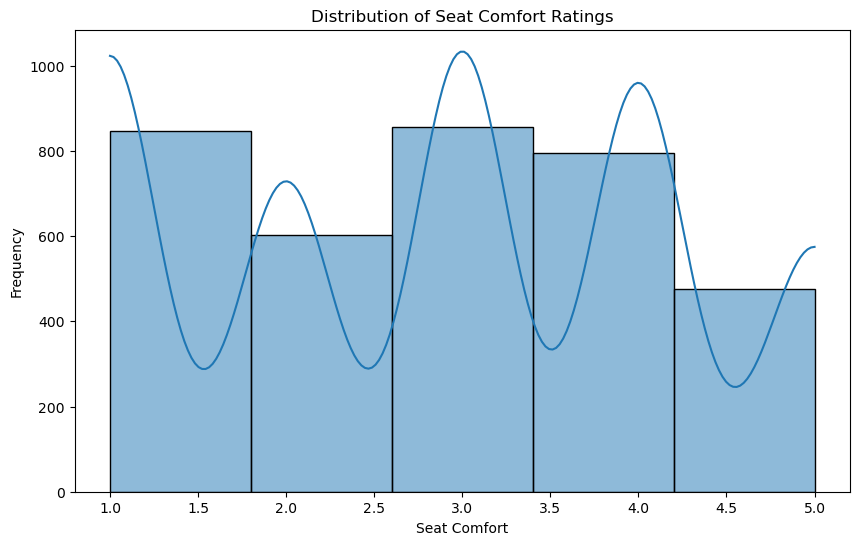

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for Seat Comfort
plt.figure(figsize=(10, 6))
sns.histplot(df['Seat Comfort'].dropna(), kde=True, bins=5)
plt.title('Distribution of Seat Comfort Ratings')
plt.xlabel('Seat Comfort')
plt.ylabel('Frequency')
plt.show()

In [28]:
# Observation

Most passengers find seats moderately comfortable with a slight skew towards higher comfort levels.

In [ ]:
# Box Plot

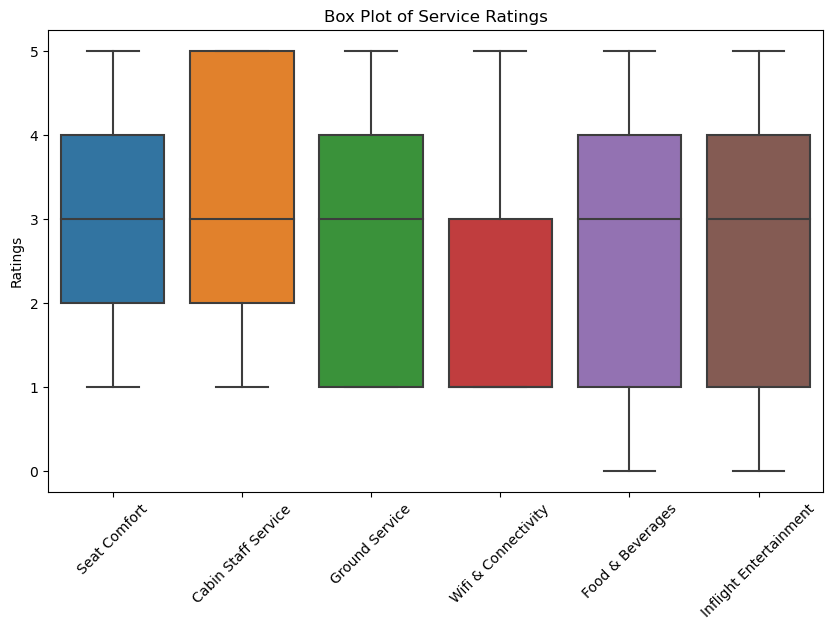

In [16]:
# Box Plot for Service Ratings
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Seat Comfort', 'Cabin Staff Service', 'Ground Service', 'Wifi & Connectivity', 'Food & Beverages', 'Inflight Entertainment']])
plt.title('Box Plot of Service Ratings')
plt.ylabel('Ratings')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Observation

Cabin Staff Service received the highest ratings but also showed the greatest variation; Wifi & Connectivity had the lowest overall ratings and room for improvement.

2. Comparative Plots

In [ ]:
# Bar Plot

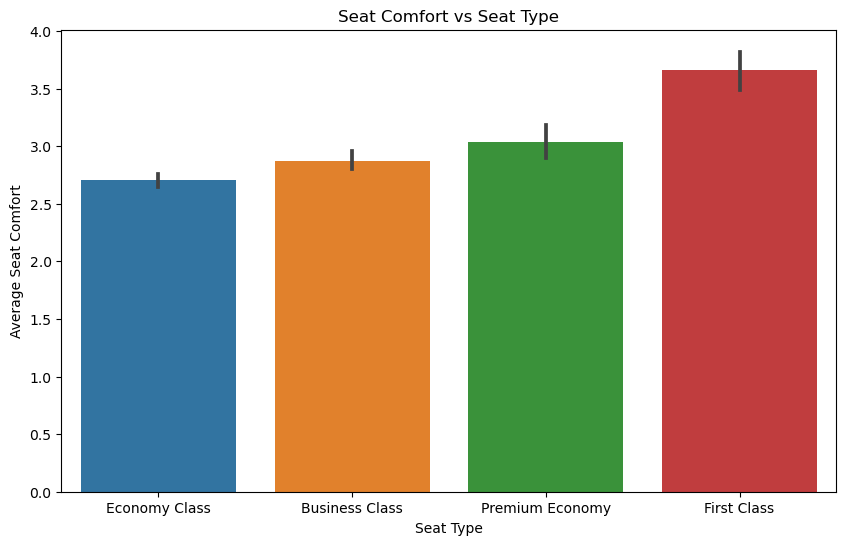

In [17]:
# Bar Plot for Value for Money vs Seat Comfort
plt.figure(figsize=(10, 6))
sns.barplot(x='Seat Type', y='Seat Comfort', data=df)
plt.title('Seat Comfort vs Seat Type')
plt.xlabel('Seat Type')
plt.ylabel('Average Seat Comfort')
plt.show()

In [ ]:
# Observation

Seat comfort increases with seat class, with First Class having the highest average rating and Economy Class having the lowest. Error bars suggest variability in comfort ratings within each seat type.

In [ ]:
# Violin Plot

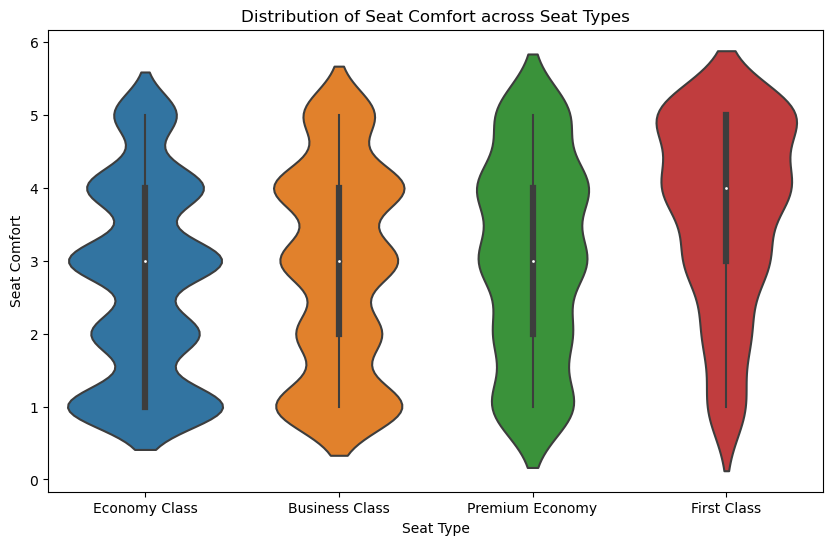

In [18]:
# Violin Plot for Seat Comfort across Seat Types
plt.figure(figsize=(10, 6))
sns.violinplot(x='Seat Type', y='Seat Comfort', data=df)
plt.title('Distribution of Seat Comfort across Seat Types')
plt.xlabel('Seat Type')
plt.ylabel('Seat Comfort')
plt.show()

In [ ]:
# Observation

Seat comfort significantly increases from Economy Class to First Class, with wider distributions (more variability) in comfort ratings for lower seat classes.

3. Correlation Analysis

In [ ]:
# Heatmap

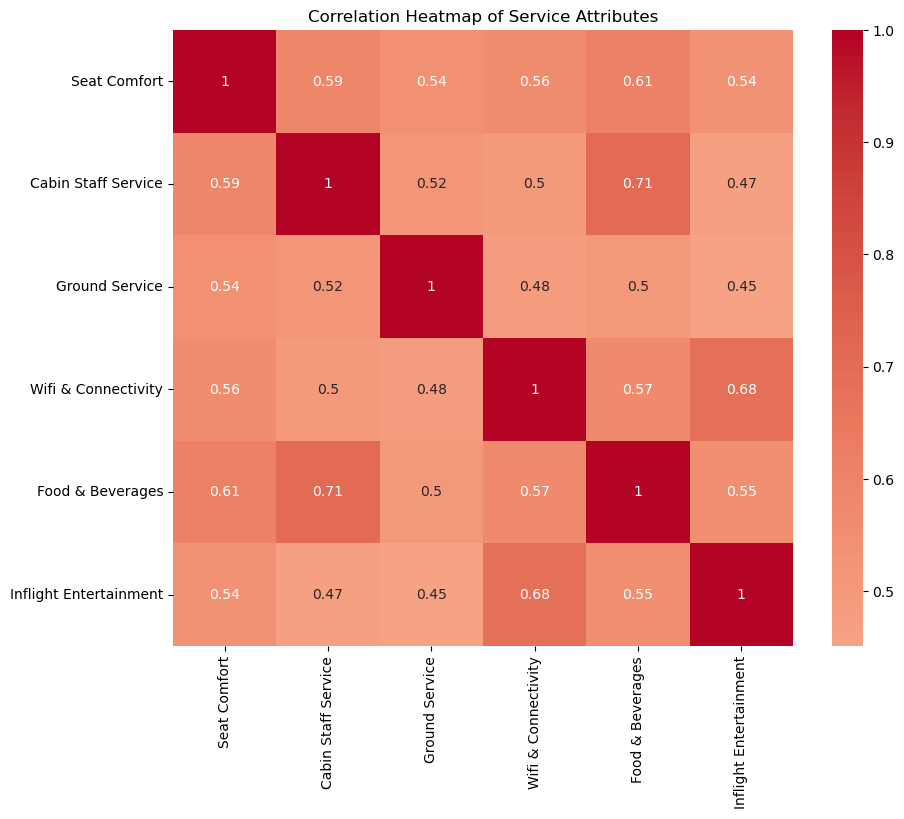

In [19]:
# Heatmap of Correlation between Service Attributes
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Seat Comfort', 'Cabin Staff Service', 'Ground Service', 'Wifi & Connectivity', 'Food & Beverages', 'Inflight Entertainment']].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Service Attributes')
plt.show()

In [ ]:
# Observation

The correlation heatmap reveals strong positive relationships between most service attributes, with Cabin Staff Service and Food & Beverages demonstrating the highest correlations. Wifi & Connectivity has a notably lower correlation with other attributes.

4. Category-based Analysis

In [ ]:
# Stacked Bar Chart

<Figure size 1000x600 with 0 Axes>

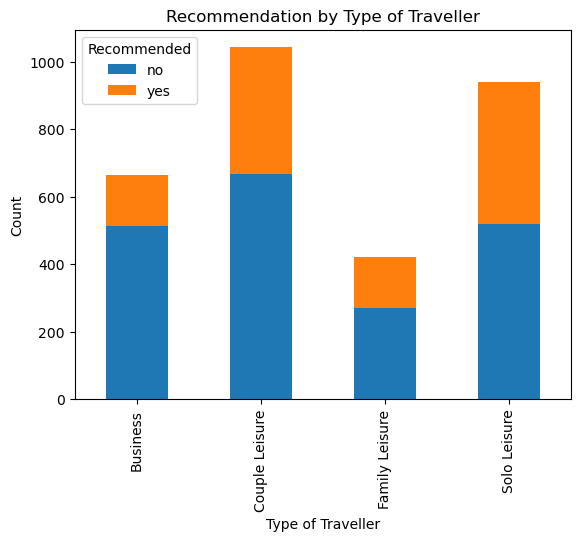

In [20]:
# Stacked Bar Chart for Recommended vs Type of Traveller
plt.figure(figsize=(10, 6))
pd.crosstab(df['Type Of Traveller'], df['Recommended']).plot(kind='bar', stacked=True)
plt.title('Recommendation by Type of Traveller')
plt.xlabel('Type of Traveller')
plt.ylabel('Count')
plt.show()

In [29]:
# Observation

Business travelers have the highest recommendation rate, followed by Couple Leisure and Solo Leisure, while Family Leisure has the lowest. The number of recommendations varies significantly across traveler types.

In [ ]:
# Pie Chart

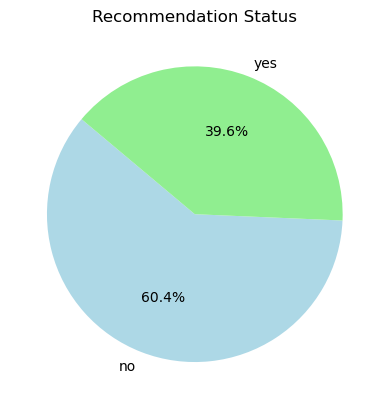

In [21]:
# Pie Chart for Recommendation Status
df['Recommended'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen'])
plt.title('Recommendation Status')
plt.ylabel('')
plt.show()

In [30]:
# Observation

The pie chart shows the recommendation status, with 39.6% of respondents recommending and 60.4% not recommending. This indicates a higher proportion of respondents did not recommend the product or service.

5. Time-based Analysis

In [ ]:
# Line Plot

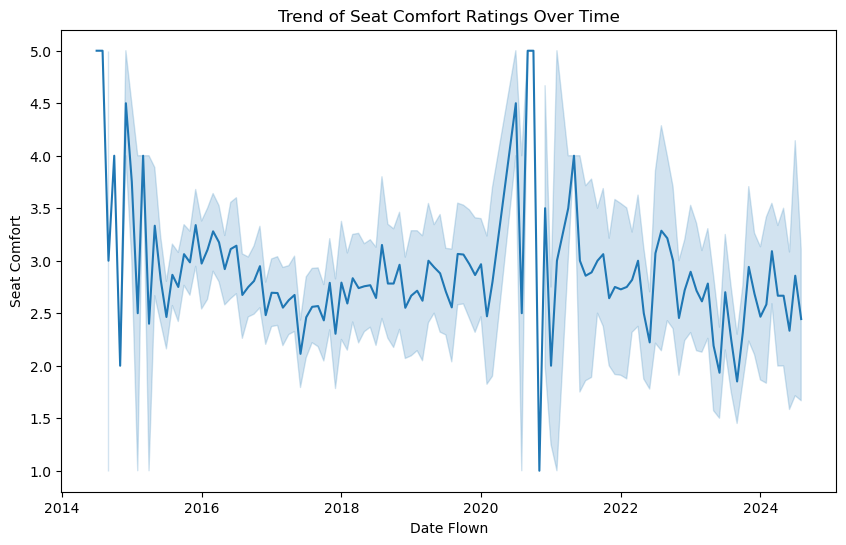

In [22]:
# Line Plot for Ratings over Time (using Seat Comfort as an example)
df['Date Flown'] = pd.to_datetime(df['Date Flown'], errors='coerce')
df = df.sort_values('Date Flown')

plt.figure(figsize=(10, 6))
sns.lineplot(x='Date Flown', y='Seat Comfort', data=df)
plt.title('Trend of Seat Comfort Ratings Over Time')
plt.xlabel('Date Flown')
plt.ylabel('Seat Comfort')
plt.show()

In [31]:
# Observation

Seat comfort ratings exhibit significant fluctuations over time, with peaks and troughs occurring throughout the years. While there's a general upward trend, the year-to-year variability is substantial.

In [ ]:
# Grouped Bar Chart

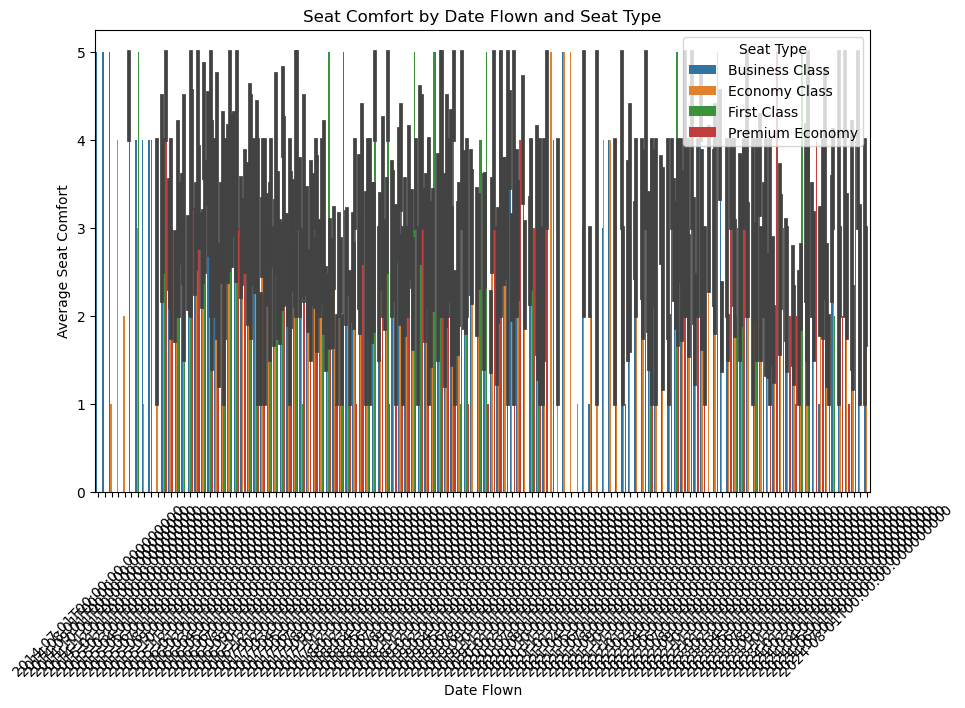

In [27]:
# Grouped Bar Chart for Ratings over Time

# Ensure 'Date Flown' is in datetime format
df['Date Flown'] = pd.to_datetime(df['Date Flown'], errors='coerce')

# Drop rows where 'Seat Comfort' or 'Date Flown' or 'Seat Type' is NaN
df_filtered = df.dropna(subset=['Seat Comfort', 'Date Flown', 'Seat Type'])

# Grouped Bar Chart for Ratings over Time
plt.figure(figsize=(10, 6))
sns.barplot(x='Date Flown', y='Seat Comfort', hue='Seat Type', data=df_filtered)
plt.title('Seat Comfort by Date Flown and Seat Type')
plt.xlabel('Date Flown')
plt.ylabel('Average Seat Comfort')
plt.xticks(rotation=45)
plt.show()

6. Sentiment Analysis

In [ ]:
# Word Cloud

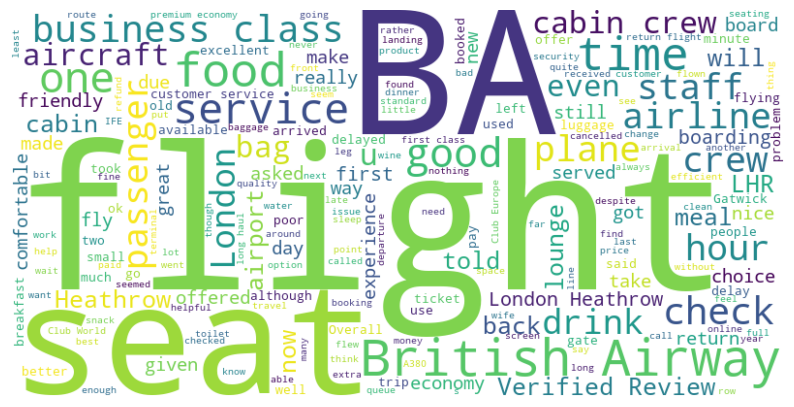

In [24]:
from wordcloud import WordCloud

# Generating Word Cloud
text = " ".join(review for review in df.reviews.dropna())
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [32]:
# Observation

The word cloud highlights key themes in airline reviews, with "service", "flight", and "cabin crew" as prominent terms. Negative words like "delayed" and "cancelled" are also visible, indicating areas for improvement.

From the wordcloud above, we can see the key of topics in customer review are flight, seat , service and time. showing that people are actively talking about their experience on the plane and the staff.

7. Route-based Analysis

In [ ]:
# Bar Plot

C:\Users\rjsek\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\rjsek\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\rjsek\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\rjsek\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\rjsek\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\rjsek\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\rjsek\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of e

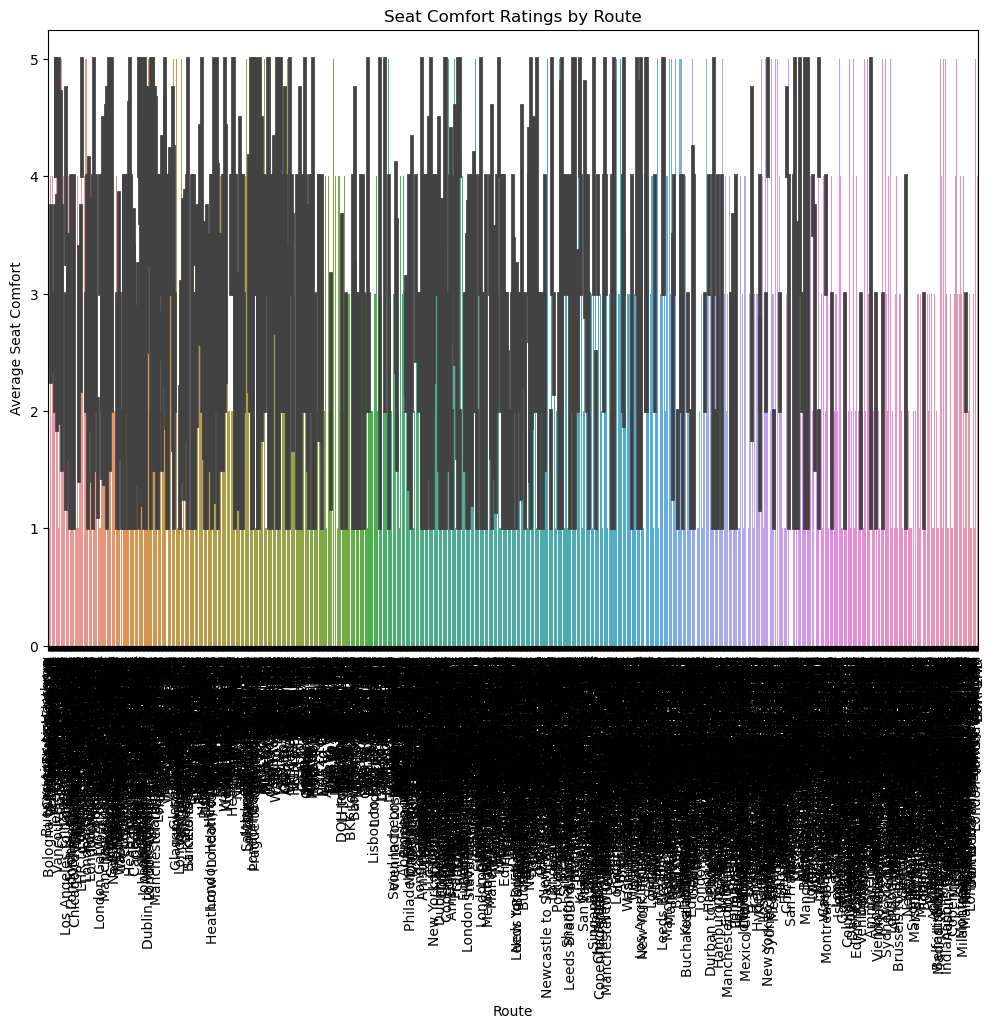

In [25]:
# Bar Plot for Seat Comfort by Route
plt.figure(figsize=(12, 8))
sns.barplot(x='Route', y='Seat Comfort', data=df)
plt.title('Seat Comfort Ratings by Route')
plt.xlabel('Route')
plt.ylabel('Average Seat Comfort')
plt.xticks(rotation=90)
plt.show()